Objetivo de la Función:
La función plot_features_num_regression debe generar gráficos de correlación entre una columna objetivo y otras columnas numéricas seleccionadas, usando pairplots de Seaborn. Los pairplots permiten visualizar las relaciones entre múltiples características y cómo esas relaciones varían con la columna objetivo. Los pairplots son especialmente útiles en el análisis exploratorio de datos (EDA).

Argumentos de la Función:
dataframe: El DataFrame que contiene los datos.
target_col: El nombre de la columna objetivo, que puede ser una columna numérica.
columns (opcional): Una lista de columnas numéricas que deseas analizar en relación con la columna objetivo. Si no se especifica, la función tomará todas las columnas numéricas.
umbral_corr (opcional): Un valor de umbral de correlación. Si se especifica, se filtrarán las columnas numéricas cuya correlación con la columna objetivo sea mayor que el umbral dado. Si no se especifica, se usarán todas las columnas numéricas.
pvalue (opcional): Umbral de significancia estadística para filtrar las variables, en caso de que quieras que solo se incluyan las columnas con una relación estadística significativa con la columna objetivo

Pasos para implementar la función:
Filtrar columnas numéricas: Identificar todas las columnas numéricas en el DataFrame.
Calcular la correlación: Calcular la correlación de cada columna numérica con la columna objetivo.
Filtrar según el umbral de correlación: Si se especifica un umbral, filtrar las columnas numéricas que tengan una correlación significativa con la columna objetivo.
Generar el gráfico: Utilizar pairplot de Seaborn para visualizar las relaciones de las columnas seleccionadas con la columna objetivo.

In [19]:
# Importar las bibliotecas necesarias
import pandas as pd  # Para manipular datos
import matplotlib.pyplot as plt  # Para gráficos
import seaborn as sns  # Para gráficos avanzados
from scipy.stats import pearsonr



def plot_features_num_regression(dataset_path, target_column):
    # (Aquí va la definición completa de la función)
    # Incluye el código completo que compartí antes.
    ...


Dataset procesado correctamente.
Columnas disponibles en el dataset: ['"Person ID', 'Gender', 'Age', 'Occupation', 'Sleep Duration', 'Quality of Sleep', 'Physical Activity Level', 'Stress Level', 'BMI Category', 'Blood Pressure', 'Heart Rate', 'Daily Steps', 'Sleep Disorder"']


C:\Users\hp\AppData\Local\Temp\ipykernel_1292\3290580575.py:75: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  data = data.apply(pd.to_numeric, errors='ignore')


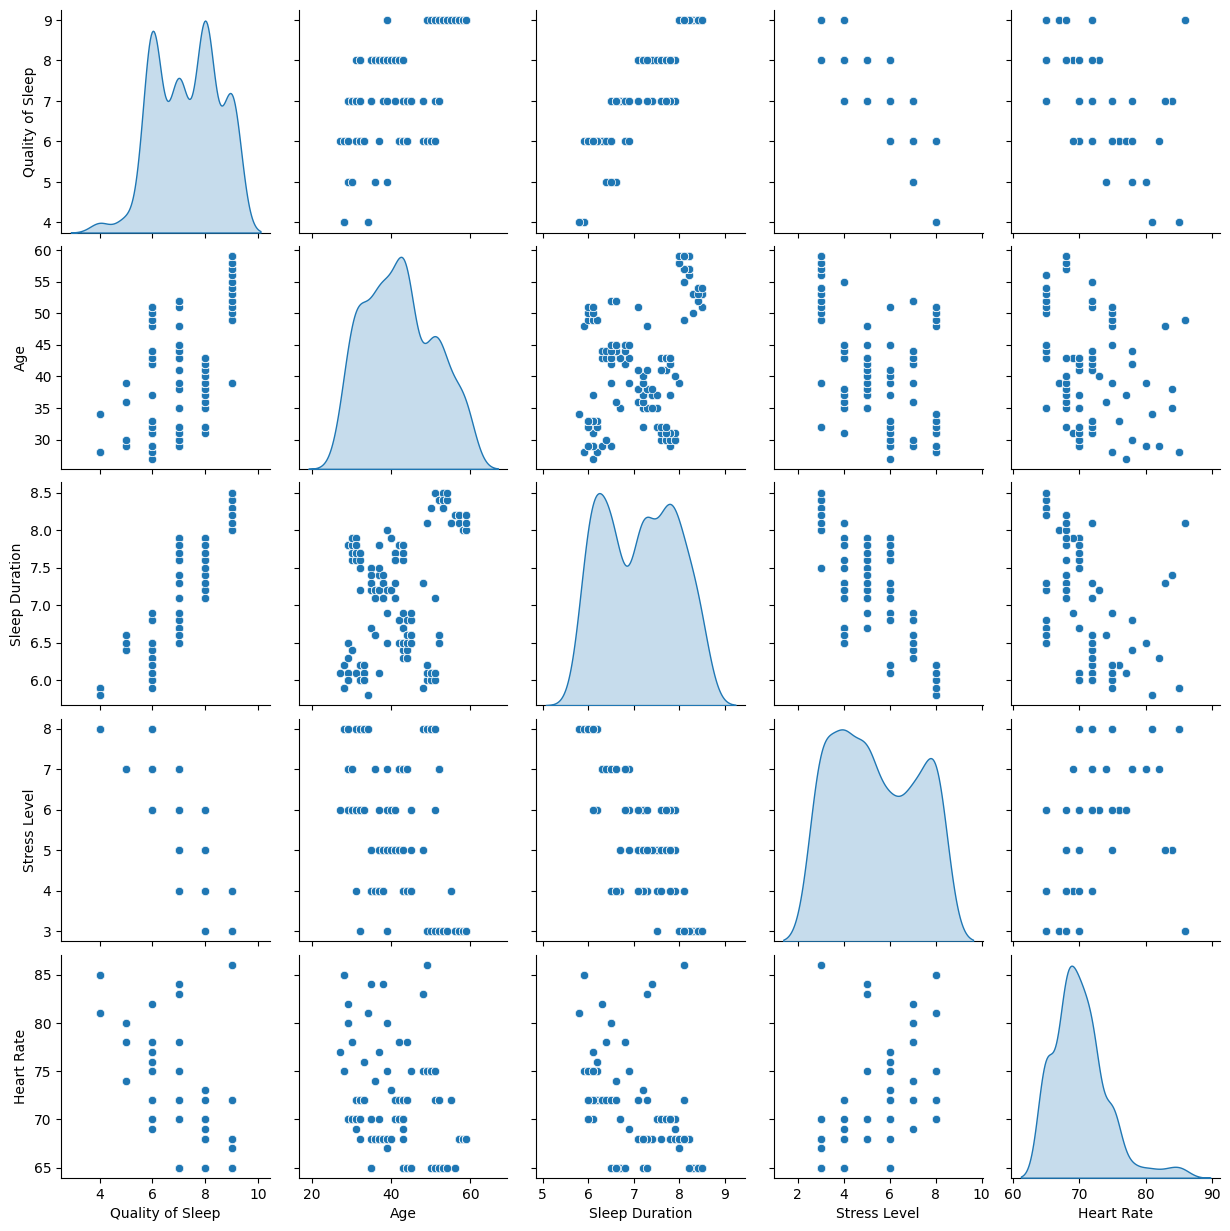

Columnas seleccionadas según los criterios: ['Age', 'Sleep Duration', 'Stress Level', 'Heart Rate']


In [23]:
# Importar las bibliotecas necesarias
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

# Definir la función `plot_features_num_regression`
def plot_features_num_regression(dataframe, target_col="", columns=[], umbral_corr=0, pvalue=None):
    """
    Genera gráficos pairplot entre una columna objetivo y columnas seleccionadas según criterios de correlación y p-valor.

    Argumentos:
        dataframe (pd.DataFrame): DataFrame con los datos.
        target_col (str): Nombre de la columna objetivo.
        columns (list): Lista de columnas a evaluar. Si está vacía, se usarán todas las columnas numéricas.
        umbral_corr (float): Valor mínimo absoluto de correlación para incluir columnas.
        pvalue (float): Nivel de significación estadística para evaluar la correlación. Si es None, no se evalúa.

    Retorno:
        list: Lista de columnas que cumplen con los criterios especificados.
    """
    # Validaciones de entrada
    if target_col not in dataframe.columns:
        raise ValueError(f"La columna objetivo '{target_col}' no está en el DataFrame.")
    if not isinstance(columns, list):
        raise TypeError("El argumento 'columns' debe ser una lista.")
    if not isinstance(umbral_corr, (int, float)):
        raise TypeError("El argumento 'umbral_corr' debe ser un número.")
    if pvalue is not None and (not isinstance(pvalue, (int, float)) or not (0 < pvalue < 1)):
        raise ValueError("El argumento 'pvalue' debe ser un número entre 0 y 1.")

    # Selección de columnas numéricas si `columns` está vacío
    if not columns:
        columns = dataframe.select_dtypes(include=['number']).columns.tolist()
        columns.remove(target_col)

    # Evaluar correlaciones
    selected_columns = []
    for col in columns:
        if col == target_col:
            continue
        corr, p = pearsonr(dataframe[target_col], dataframe[col])
        if abs(corr) >= umbral_corr and (pvalue is None or p < pvalue):
            selected_columns.append(col)

    # Dividir en grupos de máximo 5 columnas para graficar
    for i in range(0, len(selected_columns), 4):
        subset = [target_col] + selected_columns[i:i+4]
        sns.pairplot(dataframe[subset], diag_kind='kde')
        plt.show()

    # Devolver columnas seleccionadas
    return selected_columns


# Cargar el dataset correctamente procesando las columnas
dataset_path = r"C:\Users\hp\Desktop\Python Scripts\Sleep_health_and_lifestyle_dataset.csv"

try:
    # Intentar cargar el archivo manualmente con separación de columnas
    with open(dataset_path, 'r') as file:
        content = file.readlines()
    header = content[0].strip().split(",")
    rows = [line.strip().split(",") for line in content[1:]]
    data = pd.DataFrame(rows, columns=header)
    print("Dataset procesado correctamente.")
except Exception as e:
    print(f"Error al procesar el dataset: {e}")
    exit()

# Revisar columnas disponibles
print("Columnas disponibles en el dataset:", list(data.columns))

# Asegurarnos de que las columnas estén en el formato correcto
data = data.apply(pd.to_numeric, errors='ignore')

# Probar la función con el dataset cargado
target_col = "Quality of Sleep"  # Cambia según el nombre exacto en el dataset
columns_to_test = []  # Usaremos las columnas numéricas automáticamente
umbral_corr = 0.2
pvalue = 0.05

# Ejecutar la función
try:
    selected_columns = plot_features_num_regression(data, target_col, columns_to_test, umbral_corr, pvalue)
    print("Columnas seleccionadas según los criterios:", selected_columns)
except Exception as e:
    print(f"Error al ejecutar la función: {e}")
